# Pandas и визуализация

Структура занятия:

1) Введение
2) Типы данных
3) Операции над данными
4) Агрегирование и группировка

## Введение

[Pandas](https://pandas.pydata.org/docs/) — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy. 

Основные наборы данных Pandas типов DataFrame и Series применяются в качестве входных в большинстве модулей анализа данных и машинного обучения

Массивы NumPy представляют множество возможностей для работы с полными данными в задачах численных вычислений, однако имеют ограничения при работе с неполными (часть значений отсутствует), неподготовленными (разные типы или единицы изменрения), немаркированными данными.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

## Типы данных

На начальном уровне можно считать объекты Pandas расширенной версией структурированных массивов NumPy. Основные структуры Pandas:
- Series - одномерный массив индексированных данных
- DataFrame - обобщённый массив индексированных данных
- Index - массив индексов

**Series** может быть создан из списка

In [3]:
s = pd.Series([1, 2, 3, 4.0])
s

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [4]:
s.values  # массив NumPy

array([1., 2., 3., 4.])

In [5]:
s.index  # массив pd.Index

RangeIndex(start=0, stop=4, step=1)

In [6]:
s[1]

2.0

In [7]:
s[1:3]

1    2.0
2    3.0
dtype: float64

За счёт связи с явным индексом, объек Series значительно гибче нежели массив NumPy. Индекс Series может состоять из значений любого типа и не обязательно должен быть последовательным

In [8]:
s = pd.Series([1, 2, 3, '4'], index=['f', 's', 't', 'f'])
s

f    1
s    2
t    3
f    4
dtype: object

In [9]:
s['f']

f    1
f    4
dtype: object

Таким образом, структура чем-то напоминает словарь Python (за исключением, возможности задать повторяющиеся ключи в словаре), более того, Series может быть напрямую создан из словаря

In [10]:
capitals = pd.Series({'Russia': 'Moscow', 'China': 'Beijing'})
capitals

Russia     Moscow
China     Beijing
dtype: object

**DataFrame** может быть рассморен как обобщённый (n-мерный) массив NumPy

In [11]:
population = pd.Series({'Russia': 144_000_000, 'China': 1_440_000_000})
countries = pd.DataFrame({'population': population, 'capitals': capitals})
countries

,population,capitals
Russia,144000000,Moscow
China,1440000000,Beijing


DataFrame содержит множество атрибутов, рассмотрим некоторые из них

In [12]:
# метки столбцов
countries.columns

Index(['population', 'capitals'], dtype='object')

In [13]:
# метки индекса или строк
countries.index

Index(['Russia', 'China'], dtype='object')

In [14]:
# элементы
countries.values

array([[144000000, 'Moscow'],
       [1440000000, 'Beijing']], dtype=object)

In [15]:
# тоже что и индексы
countries.keys()

Index(['population', 'capitals'], dtype='object')

Обратим внимание на то что 'доступ по ключу' осуществляется не к строкам данных (к конкретным элементам), а к столбцам! Таким образом, можно рассматривать объект типа DataFrame как специализированный словарь.

In [16]:
countries['population']

Russia     144000000
China     1440000000
Name: population, dtype: int64

In [17]:
countries['Russia']

KeyError: 'Russia'

Объект DataFrame может быть создан из одного объекта Series, из списка словарей, из словаря объектов Series, из 2х мерного массива NumPy или из структурированного массива NumPy

**Index** - неизменяемый массив индексов, очень похожий по функционалу на массив NumPy, с тем отличием, что индексы невозможно модифицировать стандартными способами. Неизменяемость служит безопасному использованию индекса, его жёсткой привязке к объектам DataFrame.

In [3]:
towns = pd.read_csv('towns.csv', index_col='city')  # возможно мы потеряли какие-то города =(

In [4]:
towns

,population,lat,lon,region_name,region_name_ao,region_iso_code,federal_district,okato,oktmo,kladr_id,fias_id,place_id
city,,,,,,,,,,,,
Алейск,29.0,52.492251,82.779361,Алтайский край,NaN,RU-ALT,Сибирский,1403000000,1703000001,2200000200000,ae716080-f27b-40b6-a555-cf8b518e849e,257210632.0
Барнаул,632.4,53.347997,83.779806,Алтайский край,NaN,RU-ALT,Сибирский,1401000000,1701000001,2200000100000,d13945a8-7017-46ab-b1e6-ede1e89317ad,258390190.0
Белокуриха,15.2,51.996152,84.983960,Алтайский край,NaN,RU-ALT,Сибирский,1404000000,1704000001,2200000300000,e4edca96-9b86-4cac-8c7f-cc93d9ba4cd1,258169961.0
Бийск,199.5,52.539386,85.213845,Алтайский край,NaN,RU-ALT,Сибирский,1405000000,1705000001,2200000400000,52f876f6-cb1d-4f23-a22f-b692609fc1e0,258937159.0
Горняк,12.3,50.997962,81.464336,Алтайский край,NaN,RU-ALT,Сибирский,1225501000,1625101001,2202700100000,094b3627-2699-4782-8492-4d82aac71958,259062368.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Ростов,30.5,57.205132,39.437862,Ярославская область,NaN,RU-YAR,Центральный,78410000000,78637101001,7601400100000,ab242d02-4d6c-4a1a-a9ce-ed9db691fc31,259056467.0
Рыбинск,184.6,58.048550,38.858412,Ярославская область,NaN,RU-YAR,Центральный,78415000000,78715000001,7601500100000,292c0a6a-47ce-435d-8a75-f80e9ce67fba,258807280.0
Тутаев,39.8,57.867499,39.536963,Ярославская область,NaN,RU-YAR,Центральный,78417000000,78643101001,7601600100000,55aa704c-ff9b-45e6-9493-eb10890e2824,259241767.0


Давайте сразу удалим колонки, которые нам не нужны

In [5]:
towns[3:7]

,population,lat,lon,region_name,region_name_ao,region_iso_code,federal_district,okato,oktmo,kladr_id,fias_id,place_id
city,,,,,,,,,,,,
Бийск,199.5,52.539386,85.213845,Алтайский край,NaN,RU-ALT,Сибирский,1405000000,1705000001,2200000400000,52f876f6-cb1d-4f23-a22f-b692609fc1e0,258937159.0
Горняк,12.3,50.997962,81.464336,Алтайский край,NaN,RU-ALT,Сибирский,1225501000,1625101001,2202700100000,094b3627-2699-4782-8492-4d82aac71958,259062368.0
Заринск,45.9,53.706348,84.931508,Алтайский край,NaN,RU-ALT,Сибирский,1406000000,1706000001,2200001100000,142e04ef-dec1-44fa-b553-fac215764374,259060878.0
Змеиногорск,10.2,51.158109,82.187255,Алтайский край,NaN,RU-ALT,Сибирский,1214501000,1614101001,2201500100000,e7001b8f-d104-4873-96d4-66339f5e530a,102067728.0


In [6]:
towns[towns['population'] >= 1000]

,population,lat,lon,region_name,region_name_ao,region_iso_code,federal_district,okato,oktmo,kladr_id,fias_id,place_id
city,,,,,,,,,,,,
Волгоград,1009.0,48.707004,44.517034,Волгоградская область,NaN,RU-VGG,Южный,18401000000,18701000001,3400000100000,a52b7389-0cfe-46fb-ae15-298652a64cf8,259051115.0
Воронеж,1058.3,51.659333,39.196923,Воронежская область,NaN,RU-VOR,Центральный,20401000000,20701000001,3600000100000,5bf5ddff-6353-4a3d-80c4-6fb27f00c6c1,258682365.0
Красноярск,1093.8,56.009388,92.852481,Красноярский край,NaN,RU-KYA,Сибирский,4401000000,4701000001,2400000100000,9b968c73-f4d4-4012-8da8-3dacd4d4c1bd,258372486.0
Москва,12655.1,55.754047,37.620405,Москва,NaN,RU-MOW,Центральный,45000000000,45000000,7700000000000,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,258808740.0
Нижний Новгород,1252.2,56.324063,44.005391,Нижегородская область,NaN,RU-NIZ,Приволжский,22401000000,22701000001,5200000100000,555e7d61-d9a7-4ba6-9770-6caa8198c483,258311042.0
Новосибирск,1625.6,55.028191,82.921149,Новосибирская область,NaN,RU-NVS,Сибирский,50401000000,50701000001,5400000100000,8dea00e3-9aab-4d8e-887c-ef2aaa546456,256757597.0
Омск,1154.5,54.984857,73.367452,Омская область,NaN,RU-OMS,Сибирский,52401000000,52701000001,5500000100000,140e31da-27bf-4519-9ea0-6185d681d44e,259032027.0
Пермь,1055.4,58.010258,56.234203,Пермский край,NaN,RU-PER,Приволжский,57401000000,57701000001,5900000100000,a309e4ce-2f36-4106-b1ca-53e0f48a6d95,258924502.0
Уфа,1128.8,54.734944,55.957847,Республика Башкортостан,NaN,RU-BA,Приволжский,80401000000,80701000001,200000100000,7339e834-2cb4-4734-a4c7-1fca2c66e562,326518071.0


In [7]:
towns.region_name

city
Алейск             Алтайский край
Барнаул            Алтайский край
Белокуриха         Алтайский край
Бийск              Алтайский край
Горняк             Алтайский край
                     ...         
Ростов        Ярославская область
Рыбинск       Ярославская область
Тутаев        Ярославская область
Углич         Ярославская область
Ярославль     Ярославская область
Name: region_name, Length: 1117, dtype: object

In [8]:
towns.T

city,Алейск,Барнаул,Белокуриха,Бийск,Горняк,Заринск,Змеиногорск,Камень-на-Оби,Новоалтайск,Рубцовск,...,Данилов,Любим,Мышкин,Переславль-Залесский,Пошехонье,Ростов,Рыбинск,Тутаев,Углич,Ярославль
population,29.0,632.4,15.2,199.5,12.3,45.9,10.2,40.5,74.6,141.6,...,14.5,5.0,5.5,37.9,5.7,30.5,184.6,39.8,31.8,608.4
lat,52.492251,53.347997,51.996152,52.539386,50.997962,53.706348,51.158109,53.791397,53.411976,51.501207,...,58.18601,58.362023,57.788168,56.736054,58.506288,57.205132,58.04855,57.867499,57.522425,57.621548
lon,82.779361,83.779806,84.98396,85.213845,81.464336,84.931508,82.187255,81.354505,83.931107,81.20787,...,40.179507,40.686841,38.454422,38.854362,39.120843,39.437862,38.858412,39.536963,38.302004,39.897741
region_name,Алтайский край,Алтайский край,Алтайский край,Алтайский край,Алтайский край,Алтайский край,Алтайский край,Алтайский край,Алтайский край,Алтайский край,...,Ярославская область,Ярославская область,Ярославская область,Ярославская область,Ярославская область,Ярославская область,Ярославская область,Ярославская область,Ярославская область,Ярославская область
region_name_ao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_iso_code,RU-ALT,RU-ALT,RU-ALT,RU-ALT,RU-ALT,RU-ALT,RU-ALT,RU-ALT,RU-ALT,RU-ALT,...,RU-YAR,RU-YAR,RU-YAR,RU-YAR,RU-YAR,RU-YAR,RU-YAR,RU-YAR,RU-YAR,RU-YAR
federal_district,Сибирский,Сибирский,Сибирский,Сибирский,Сибирский,Сибирский,Сибирский,Сибирский,Сибирский,Сибирский,...,Центральный,Центральный,Центральный,Центральный,Центральный,Центральный,Центральный,Центральный,Центральный,Центральный
okato,1403000000,1401000000,1404000000,1405000000,1225501000,1406000000,1214501000,1216501000,1413000000,1416000000,...,78215501000,78218501000,78221501000,78405000000,78234501000,78410000000,78415000000,78417000000,78420000000,78401000000
oktmo,1703000001,1701000001,1704000001,1705000001,1625101001,1706000001,1614101001,1616101001,1713000001,1716000001,...,78615101001,78618101001,78621101001,78705000001,78634101,78637101001,78715000001,78643101001,78646101001,78701000001
kladr_id,2200000200000,2200000100000,2200000300000,2200000400000,2202700100000,2200001100000,2201500100000,2201800100000,2200000800000,2200000900000,...,7600600100000,7600700100000,7600800100000,7600000200000,7601300100000,7601400100000,7601500100000,7601600100000,7601700100000,7600000100000


Существует 2 вида индексаторов:
- `.loc` - индексация и срезы с использованием явного индекса
- `.iloc` - с использованием неявного индекса в стиле Python

In [9]:
towns.loc[:'Москва', :'region_name']

,population,lat,lon,region_name
city,,,,
Алейск,29.0,52.492251,82.779361,Алтайский край
Барнаул,632.4,53.347997,83.779806,Алтайский край
Белокуриха,15.2,51.996152,84.983960,Алтайский край
Бийск,199.5,52.539386,85.213845,Алтайский край
Горняк,12.3,50.997962,81.464336,Алтайский край
...,...,...,...,...
Усмань,19.6,52.044265,39.726401,Липецкая область
Чаплыгин,11.8,53.240480,39.967097,Липецкая область
Магадан,92.1,59.568133,150.808496,Магаданская область


In [10]:
towns.iloc[:413, :4]

,population,lat,lon,region_name
city,,,,
Алейск,29.0,52.492251,82.779361,Алтайский край
Барнаул,632.4,53.347997,83.779806,Алтайский край
Белокуриха,15.2,51.996152,84.983960,Алтайский край
Бийск,199.5,52.539386,85.213845,Алтайский край
Горняк,12.3,50.997962,81.464336,Алтайский край
...,...,...,...,...
Усмань,19.6,52.044265,39.726401,Липецкая область
Чаплыгин,11.8,53.240480,39.967097,Липецкая область
Магадан,92.1,59.568133,150.808496,Магаданская область


In [11]:
towns.loc[(towns.population > 1000) & (towns.population < 2000), ['region_name', 'federal_district']]

,region_name,federal_district
city,,
Волгоград,Волгоградская область,Южный
Воронеж,Воронежская область,Центральный
Красноярск,Красноярский край,Сибирский
Нижний Новгород,Нижегородская область,Приволжский
Новосибирск,Новосибирская область,Сибирский
Омск,Омская область,Сибирский
Пермь,Пермский край,Приволжский
Уфа,Республика Башкортостан,Приволжский
Казань,Республика Татарстан,Приволжский


## Операции над данными

Как и в случае с NumPy, Pandas позволяет оперировать над данными с помощью универсальныйх функций. При использовании унарных функций (изменение знака, тригонометрия) индексы будут сохранены, а при использовании бинарных - Pandas будет автоматически выравнивать индексы. 

In [12]:
A = pd.DataFrame([[1,2,3],[1,2,3],[1,2,3]])
B = pd.DataFrame([[1,2,0],[1,2],[1,2]])
C = A + B  # срабатывает выравнивание индекса
C

,0,1,2
0,2,4,3.0
1,2,4,NaN
2,2,4,NaN


Обратите внимание на то, как Pandas работает с отсутствующими данными, в данном случае он просто заменяет их на NaN, что в общем случае эквивалентно `None`

Что можно сделать с пустыми значениями:
- выявить `.isnull()`, `.notnull()`
- удалить `.dropna`
- заполнить `.fillna`

In [13]:
C.notnull()

,0,1,2
0,True,True,True
1,True,True,False
2,True,True,False


In [14]:
C.dropna()

,0,1,2
0,2,4,3.0


In [15]:
C.dropna(axis=1)

,0,1
0,2,4
1,2,4
2,2,4


In [16]:
C.dropna(how='any')  # 'all'

,0,1,2
0,2,4,3.0


In [17]:
C.fillna(0)

,0,1,2
0,2,4,3.0
1,2,4,0.0
2,2,4,0.0


Pandas позволяет управлять индексами в уже готовых объектах, например, можно выставить простой инкрементальный индекс и вернуть текущий в колонку данных 

In [18]:
towns = towns.reset_index()
towns

,city,population,lat,lon,region_name,region_name_ao,region_iso_code,federal_district,okato,oktmo,kladr_id,fias_id,place_id
0,Алейск,29.0,52.492251,82.779361,Алтайский край,NaN,RU-ALT,Сибирский,1403000000,1703000001,2200000200000,ae716080-f27b-40b6-a555-cf8b518e849e,257210632.0
1,Барнаул,632.4,53.347997,83.779806,Алтайский край,NaN,RU-ALT,Сибирский,1401000000,1701000001,2200000100000,d13945a8-7017-46ab-b1e6-ede1e89317ad,258390190.0
2,Белокуриха,15.2,51.996152,84.983960,Алтайский край,NaN,RU-ALT,Сибирский,1404000000,1704000001,2200000300000,e4edca96-9b86-4cac-8c7f-cc93d9ba4cd1,258169961.0
3,Бийск,199.5,52.539386,85.213845,Алтайский край,NaN,RU-ALT,Сибирский,1405000000,1705000001,2200000400000,52f876f6-cb1d-4f23-a22f-b692609fc1e0,258937159.0
4,Горняк,12.3,50.997962,81.464336,Алтайский край,NaN,RU-ALT,Сибирский,1225501000,1625101001,2202700100000,094b3627-2699-4782-8492-4d82aac71958,259062368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Ростов,30.5,57.205132,39.437862,Ярославская область,NaN,RU-YAR,Центральный,78410000000,78637101001,7601400100000,ab242d02-4d6c-4a1a-a9ce-ed9db691fc31,259056467.0
1113,Рыбинск,184.6,58.048550,38.858412,Ярославская область,NaN,RU-YAR,Центральный,78415000000,78715000001,7601500100000,292c0a6a-47ce-435d-8a75-f80e9ce67fba,258807280.0
1114,Тутаев,39.8,57.867499,39.536963,Ярославская область,NaN,RU-YAR,Центральный,78417000000,78643101001,7601600100000,55aa704c-ff9b-45e6-9493-eb10890e2824,259241767.0
1115,Углич,31.8,57.522425,38.302004,Ярославская область,NaN,RU-YAR,Центральный,78420000000,78646101001,7601700100000,bddb02e3-ce5b-4128-8433-b4ad228914b9,257920676.0


При помощи индексов можно задавать для данных дополнительные измерения. Создадим **мультииндекс**, при этом, порядок выбираем от общего к частному... это необязательно, порядок может быть любым, и будет зависеть от желаемой группировки

In [19]:
towns = towns.set_index(['federal_district', 'region_name', 'city'])
towns

population        lat   
federal_district region_name         city                                
Сибирский        Алтайский край      Алейск            29.0  52.492251  \
                                     Барнаул          632.4  53.347997   
                                     Белокуриха        15.2  51.996152   
                                     Бийск            199.5  52.539386   
                                     Горняк            12.3  50.997962   
...                                                     ...        ...   
Центральный      Ярославская область Ростов            30.5  57.205132   
                                     Рыбинск          184.6  58.048550   
                                     Тутаев            39.8  57.867499   
                                     Углич             31.8  57.522425   
                                     Ярославль        608.4  57.621548   

                                                       lon region_name_ao   
federal_district region_name         city                                   
Сибирский        Алтайский край      Алейск      82.779361            NaN  \
                                     Барнаул     83.779806            NaN   
                                     Белокуриха  84.983960            NaN   
                                     Бийск       85.213845            NaN   
                                     Горняк      81.464336            NaN   
...                                                    ...            ...   
Центральный      Ярославская область Ростов      39.437862            NaN   
                                     Рыбинск     38.858412            NaN   
                                     Тутаев      39.536963            NaN   
                                     Углич       38.302004            NaN   
                                     Ярославль   39.897741            NaN   

                                                region_iso_code        okato   
federal_district region_name         city                                      
Сибирский        Алтайский край      Алейск              RU-ALT   1403000000  \
                                     Барнаул             RU-ALT   1401000000   
                                     Белокуриха          RU-ALT   1404000000   
                                     Бийск               RU-ALT   1405000000   
                                     Горняк              RU-ALT   1225501000   
...                                                         ...          ...   
Центральный      Ярославская область Ростов              RU-YAR  78410000000   
                                     Рыбинск             RU-YAR  78415000000   
                                     Тутаев              RU-YAR  78417000000   
                                     Углич               RU-YAR  78420000000   
                                     Ярославль           RU-YAR  78401000000   

                                                       oktmo       kladr_id   
federal_district region_name         city                                     
Сибирский        Алтайский край      Алейск       1703000001  2200000200000  \
                                     Барнаул      1701000001  2200000100000   
                                     Белокуриха   1704000001  2200000300000   
                                     Бийск        1705000001  2200000400000   
                                     Горняк       1625101001  2202700100000   
...                                                      ...            ...   
Центральный      Ярославская область Ростов      78637101001  7601400100000   
                                     Рыбинск     78715000001  7601500100000   
                                     Тутаев      78643101001  7601600100000   
                                     Углич       78646101001  7601700100000   
                                     Ярославль   78701000001  7600000100000   

               

Теперь можно работать с данными, используя составной индекс

In [20]:
towns.loc[('Сибирский', 'Алтайский край', 'Барнаул'), :]

population                                        632.4
lat                                           53.347997
lon                                           83.779806
region_name_ao                                      NaN
region_iso_code                                  RU-ALT
okato                                        1401000000
oktmo                                        1701000001
kladr_id                                  2200000100000
fias_id            d13945a8-7017-46ab-b1e6-ede1e89317ad
place_id                                    258390190.0
Name: (Сибирский, Алтайский край, Барнаул), dtype: object

In [21]:
towns.loc[('Сибирский', 'Алтайский край'), :]

/var/folders/wl/8clbmf516071tgqb9wcnpqr00000gn/T/ipykernel_43523/3471146780.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  towns.loc[('Сибирский', 'Алтайский край'), :]


,population,lat,lon,region_name_ao,region_iso_code,okato,oktmo,kladr_id,fias_id,place_id
city,,,,,,,,,,
Алейск,29.0,52.492251,82.779361,NaN,RU-ALT,1403000000,1703000001,2200000200000,ae716080-f27b-40b6-a555-cf8b518e849e,257210632.0
Барнаул,632.4,53.347997,83.779806,NaN,RU-ALT,1401000000,1701000001,2200000100000,d13945a8-7017-46ab-b1e6-ede1e89317ad,258390190.0
Белокуриха,15.2,51.996152,84.983960,NaN,RU-ALT,1404000000,1704000001,2200000300000,e4edca96-9b86-4cac-8c7f-cc93d9ba4cd1,258169961.0
Бийск,199.5,52.539386,85.213845,NaN,RU-ALT,1405000000,1705000001,2200000400000,52f876f6-cb1d-4f23-a22f-b692609fc1e0,258937159.0
Горняк,12.3,50.997962,81.464336,NaN,RU-ALT,1225501000,1625101001,2202700100000,094b3627-2699-4782-8492-4d82aac71958,259062368.0
Заринск,45.9,53.706348,84.931508,NaN,RU-ALT,1406000000,1706000001,2200001100000,142e04ef-dec1-44fa-b553-fac215764374,259060878.0
Змеиногорск,10.2,51.158109,82.187255,NaN,RU-ALT,1214501000,1614101001,2201500100000,e7001b8f-d104-4873-96d4-66339f5e530a,102067728.0
Камень-на-Оби,40.5,53.791397,81.354505,NaN,RU-ALT,1216501000,1616101001,2201800100000,810ca9c7-f10e-4def-9c48-f0aa83168ca7,258670270.0
Новоалтайск,74.6,53.411976,83.931107,NaN,RU-ALT,1413000000,1713000001,2200000800000,aa288d9f-4b2a-42a6-97f0-3502dddfa383,257197346.0


In [22]:
towns.loc[('Сибирский'), :]

population        lat        lon region_name_ao   
region_name     city                                                          
Алтайский край  Алейск            29.0  52.492251  82.779361            NaN  \
                Барнаул          632.4  53.347997  83.779806            NaN   
                Белокуриха        15.2  51.996152  84.983960            NaN   
                Бийск            199.5  52.539386  85.213845            NaN   
                Горняк            12.3  50.997962  81.464336            NaN   
...                                ...        ...        ...            ...   
Томская область Кедровый           1.9  57.561869  79.567782            NaN   
                Колпашево         22.9  58.311425  82.902583            NaN   
                Северск          106.5  56.603128  84.880993            NaN   
                Стрежевой         40.8  60.732895  77.604122            NaN   
                Томск            576.6  56.484580  84.948158            NaN   

                           region_iso_code        okato        oktmo   
region_name     city                                                   
Алтайский край  Алейск              RU-ALT   1403000000   1703000001  \
                Барнаул             RU-ALT   1401000000   1701000001   
                Белокуриха          RU-ALT   1404000000   1704000001   
                Бийск               RU-ALT   1405000000   1705000001   
                Горняк              RU-ALT   1225501000   1625101001   
...                                    ...          ...          ...   
Томская область Кедровый            RU-TOM  69407000000  69707000001   
                Колпашево           RU-TOM  69232501000  69632101001   
                Северск             RU-TOM  69541000000  69741000001   
                Стрежевой           RU-TOM  69410000000  69710000001   
                Томск               RU-TOM  69401000000  69701000001   

                                 kladr_id   
region_name     city                        
Алтайский край  Алейск      2200000200000  \
                Барнаул     2200000100000   
                Белокуриха  2200000300000   
                Бийск       2200000400000   
                Горняк      2202700100000   
...                                   ...   
Томская область Кедровый    7000000200000   
                Колпашево   7000900100000   
                Северск     7000000300000   
                Стрежевой   7000000400000   
                Томск       7000000100000   

                                                         fias_id     place_id  
region_name     city                                                           
Алтайский край  Алейск      ae716080-f27b-40b6-a555-cf8b518e849e  257210632.0  
                Барнаул     d13945a8-7017-46ab-b1e6-ede1e89317ad  258390190.0  
                Белокуриха  e4edca96-9b86-4cac-8c7f-cc93d9ba4cd1  258169961.0  
                Бийск       52f876f6-cb1d-4f23-a22f-b692609fc1e0  258937159.0  
                Горняк      094b3627-2699-4782-8492-4d82aac71958  259062368.0  
...                                                          ...          ...  
Томская область Кедровый    59cb7e41-b681-40c8-97f2-13374a397867  130308687.0  
                Колпашево   c29a885f-a8c8-43b4-aecd-d439d36f5e47  130446036.0  
                Северск     53c22352-eb6f-4163-a4d1-385d64561d2f  131523223.0  
                Стрежевой   0a0fe1fc-8aab-4ff3-a2a3-971ee4fcd27f  121486668.0  
                Томск       e3b0eae8-a4ce-4779-ae04-5c0797de66be  259415839.0  

[114 rows x 10 columns]

In [46]:
towns = towns.reset_index()

Одно из выжнейших свойств Pandas - её высокопроизводительные операции соединения и слияния данных. Основной интерфейс `pd.merge`, реализует множество типов соединений: один-к-одному / многие-к-одному / многие-ко-многим. Тип будет зависеть от входных данных: слияние может быть произведено по колонкам с одинаковыми именами, или по указанным вручную колонкам (с импользованием аргументов `on`, `left_on`, `right_on`), или даже по индексам (`left_index`, `right_index`). 

Более продвинутая работа со слиянием напоминает работу с реляционными данными, можно также задать метод соединения при помощи аргумента `how`, возможные варианты: `inner`, `outer`, `left`, `right`

Создадим более сложный датафрейм данных, обогатив изначальные данные по городам информацией по регионам

In [23]:
regions = pd.read_csv('regions.csv', index_col='Субъект', delimiter=';')

In [24]:
regions

,площадь,процент,округ
Субъект,,,
Республика Саха (Якутия),3083523,"18,01",Дальневосточный
Красноярский край,2366797,"13,82",Сибирский
Тюменская область с ХМАО и ЯНАО,1464173,"8,55",Уральский
Хабаровский край,787633,"4,6",Дальневосточный
Иркутская область,774846,"4,52",Сибирский
...,...,...,...
Республика Адыгея,7792,"0,05",Южный
Республика Ингушетия,3123,"0,02",Северо-Кавказский
Москва,2561,"0,01",Центральный


In [113]:
regions['region_name'] = regions.index  # создадим колонку с именем, как в датафрейме с городами 

In [49]:
regions_s = set(regions['region_name'].unique())

In [50]:
towns_s = set(towns['region_name'].unique())

In [116]:
regions_s.difference(towns_s)

{'Архангельская область без НАО',
 'Архангельская область включая НАО',
 'Кабардино-Балкария',
 'Карачаево-Черкесия',
 'Кемеровская область',
 'Ненецкий автономный округ',
 'Республика Северная Осетия — Алания',
 'Тюменская область без ХМАО и ЯНАО',
 'Тюменская область с ХМАО и ЯНАО',
 'Ханты-Мансийский автономный округ — Югра',
 'Ямало-Ненецкий автономный округ'}

In [117]:
towns_s.difference(regions_s)

{'Архангельская область',
 'Кабардино-Балкарская Республика',
 'Карачаево-Черкесская Республика',
 'Кемеровская область - Кузбасс',
 'Республика Северная Осетия – Алания',
 'Тюменская область'}

In [118]:
regions.loc['Кабардино-Балкария', 'region_name'] = 'Кабардино-Балкарская Республика'
regions.loc['Карачаево-Черкесия', 'region_name'] = 'Карачаево-Черкесская Республика'
regions.loc['Кемеровская область', 'region_name'] = 'Кемеровская область - Кузбасс'
regions.loc['Тюменская область с ХМАО и ЯНАО', 'region_name'] = 'Тюменская область'
regions.loc['Архангельская область включая НАО', 'region_name'] = 'Архангельская область'

In [54]:
regions.rename({'округ': 'federal_district', 'площадь': 'region_area', 'процент': 'region_size_percent'}, axis=1, inplace=True)

In [55]:
regions

,region_area,region_size_percent,federal_district,region_name
Субъект,,,,
Республика Саха (Якутия),3083523,"18,01",Дальневосточный,Республика Саха (Якутия)
Красноярский край,2366797,"13,82",Сибирский,Красноярский край
Тюменская область с ХМАО и ЯНАО,1464173,"8,55",Уральский,Тюменская область
Хабаровский край,787633,"4,6",Дальневосточный,Хабаровский край
Иркутская область,774846,"4,52",Сибирский,Иркутская область
...,...,...,...,...
Республика Адыгея,7792,"0,05",Южный,Республика Адыгея
Республика Ингушетия,3123,"0,02",Северо-Кавказский,Республика Ингушетия
Москва,2561,"0,01",Центральный,Москва


In [56]:
towns_extended = pd.merge(towns, regions, how='left')  # объединим датафреймы по колонкам с одинковыми названиями

In [57]:
towns_extended

,federal_district,region_name,city,population,lat,lon,region_name_ao,region_iso_code,okato,oktmo,kladr_id,fias_id,place_id,region_area,region_size_percent
0,Сибирский,Алтайский край,Алейск,29.0,52.492251,82.779361,NaN,RU-ALT,1403000000,1703000001,2200000200000,ae716080-f27b-40b6-a555-cf8b518e849e,257210632.0,167996.0,"0,98"
1,Сибирский,Алтайский край,Барнаул,632.4,53.347997,83.779806,NaN,RU-ALT,1401000000,1701000001,2200000100000,d13945a8-7017-46ab-b1e6-ede1e89317ad,258390190.0,167996.0,"0,98"
2,Сибирский,Алтайский край,Белокуриха,15.2,51.996152,84.983960,NaN,RU-ALT,1404000000,1704000001,2200000300000,e4edca96-9b86-4cac-8c7f-cc93d9ba4cd1,258169961.0,167996.0,"0,98"
3,Сибирский,Алтайский край,Бийск,199.5,52.539386,85.213845,NaN,RU-ALT,1405000000,1705000001,2200000400000,52f876f6-cb1d-4f23-a22f-b692609fc1e0,258937159.0,167996.0,"0,98"
4,Сибирский,Алтайский край,Горняк,12.3,50.997962,81.464336,NaN,RU-ALT,1225501000,1625101001,2202700100000,094b3627-2699-4782-8492-4d82aac71958,259062368.0,167996.0,"0,98"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Центральный,Ярославская область,Ростов,30.5,57.205132,39.437862,NaN,RU-YAR,78410000000,78637101001,7601400100000,ab242d02-4d6c-4a1a-a9ce-ed9db691fc31,259056467.0,36177.0,"0,21"
1113,Центральный,Ярославская область,Рыбинск,184.6,58.048550,38.858412,NaN,RU-YAR,78415000000,78715000001,7601500100000,292c0a6a-47ce-435d-8a75-f80e9ce67fba,258807280.0,36177.0,"0,21"
1114,Центральный,Ярославская область,Тутаев,39.8,57.867499,39.536963,NaN,RU-YAR,78417000000,78643101001,7601600100000,55aa704c-ff9b-45e6-9493-eb10890e2824,259241767.0,36177.0,"0,21"
1115,Центральный,Ярославская область,Углич,31.8,57.522425,38.302004,NaN,RU-YAR,78420000000,78646101001,7601700100000,bddb02e3-ce5b-4128-8433-b4ad228914b9,257920676.0,36177.0,"0,21"


Так как мы выбрали левое соедиенение, данные в towns не пропали, несмотря на то что им не нашлось соответствия из regions. Все поля из regions были заменены на NaN, найдём их по одному из полей

In [49]:
towns_extended[towns_extended.region_area.isnull()]

,federal_district,region_name,city,population,lat,lon,region_name_ao,region_iso_code,okato,oktmo,kladr_id,fias_id,place_id,region_area,region_size_percent
753,Северо-Кавказский,Республика Северная Осетия – Алания,Алагир,19.7,43.041768,44.219971,NaN,RU-SE,90205501000,90605101001,1500200100000,e6dcf985-09c1-4ede-ba3d-de714f0a5787,100535234.0,NaN,NaN
754,Северо-Кавказский,Республика Северная Осетия – Алания,Ардон,19.3,43.175515,44.295578,NaN,RU-SE,90210501000,90610101001,1500300100000,fc26547e-11ce-464b-b4f2-96b37df6f23f,98725849.0,NaN,NaN
755,Северо-Кавказский,Республика Северная Осетия – Алания,Беслан,37.4,43.193753,44.533871,NaN,RU-SE,90235501000,90635101001,1500800100000,cbf3eb9d-f86c-4dbb-ba9e-f9f6521b096f,100762904.0,NaN,NaN
756,Северо-Кавказский,Республика Северная Осетия – Алания,Владикавказ,303.6,43.020588,44.681918,NaN,RU-SE,90401000000,90701000001,1500000100000,20ea2341-4f49-4c5c-a9dc-a54688c8cc61,259769509.0,NaN,NaN
757,Северо-Кавказский,Республика Северная Осетия – Алания,Дигора,10.1,43.156763,44.154948,NaN,RU-SE,90215501000,90615101001,1500400100000,aa883f13-ea3c-4b7f-9f3c-309a2b38db04,122826426.0,NaN,NaN
758,Северо-Кавказский,Республика Северная Осетия – Алания,Моздок,42.0,43.747134,44.656961,NaN,RU-SE,90230501000,90630101001,1500700100000,654ce513-3c99-414d-88b8-846097cc9ae3,1253429.0,NaN,NaN


## Агрегирование и группировка

Важная часть анализа данных - эффективное обощение: вычисление сводных показателей, в которых одно число позволяет понять природу всего набора данных

Установим пакет `seaborn`, который содержит множество интересных наборов данных

https://science.nasa.gov/exoplanets/exoplanet-catalog/

In [50]:
pip install seaborn


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import seaborn as sn

In [29]:
planets = sn.load_dataset('planets')

In [123]:
planets.shape

(1035, 6)

In [4]:
planets.sort_values('year')

,method,number,orbital_period,mass,distance,year
441,Radial Velocity,1,83.888000,11.680,40.57,1989
942,Pulsar Timing,3,66.541900,NaN,NaN,1992
941,Pulsar Timing,3,25.262000,NaN,NaN,1992
943,Pulsar Timing,3,98.211400,NaN,NaN,1994
16,Radial Velocity,1,4.230785,0.472,15.36,1995
...,...,...,...,...,...,...
846,Transit,2,15.965400,NaN,NaN,2014
847,Transit,2,179.612000,NaN,NaN,2014
849,Transit,4,6.164860,NaN,NaN,2014
851,Transit,4,23.980200,NaN,NaN,2014


Метод `.describe` вычисляет сразу несколько самых используемых сводных показателей для каждого столбца

In [5]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


Объекты Pandas имеют набор простых агрегирующих методов, таких как `.count()`, `.mean()`, `.min()`, `.max()`, `.std()`, `.sum()`, `.prod()`. 

Более глубокое исследование обобщённых данных достигается при помощи операции `groupby`, которая производит разбиение (по ключу), применение (какой-либо функции) и объединение (результатов)

In [6]:
planets.groupby('method')['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [7]:
planets.groupby('method')['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


Можно создавать сводные таблицы (обыно на многомерном индексе)

In [8]:
planets.pivot_table('number', index='year', columns='method', aggfunc='count')

method,Astrometry,Eclipse Timing Variations,Imaging,Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations
year,,,,,,,,,,
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN


Мощным средством группировок являются временные ряды. Для того чтобы их использвать, необходимо привести данные к форматц даты и времени.

In [11]:
planets['date'] = pd.to_datetime(planets['year'], format='%Y')

In [12]:
planets

,method,number,orbital_period,mass,distance,year,date
0,Radial Velocity,1,269.300000,7.10,77.40,2006,2006-01-01
1,Radial Velocity,1,874.774000,2.21,56.95,2008,2008-01-01
2,Radial Velocity,1,763.000000,2.60,19.84,2011,2011-01-01
3,Radial Velocity,1,326.030000,19.40,110.62,2007,2007-01-01
4,Radial Velocity,1,516.220000,10.50,119.47,2009,2009-01-01
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,2006-01-01
1031,Transit,1,2.615864,NaN,148.00,2007,2007-01-01
1032,Transit,1,3.191524,NaN,174.00,2007,2007-01-01
1033,Transit,1,4.125083,NaN,293.00,2008,2008-01-01


In [17]:
planets_copy = planets.copy()

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

<Axes: xlabel='date'>

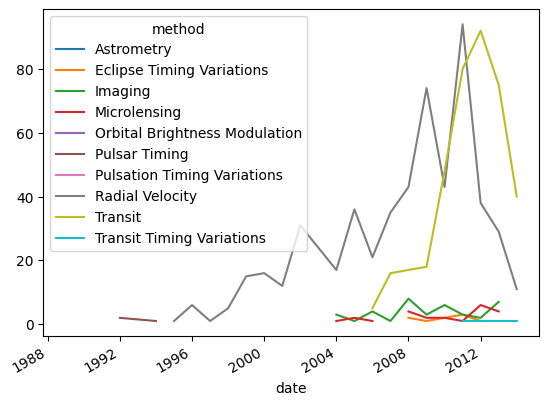

In [19]:
planets_pt = planets_copy.pivot_table('number', index='date', columns='method', aggfunc='count')
planets_pt.plot()

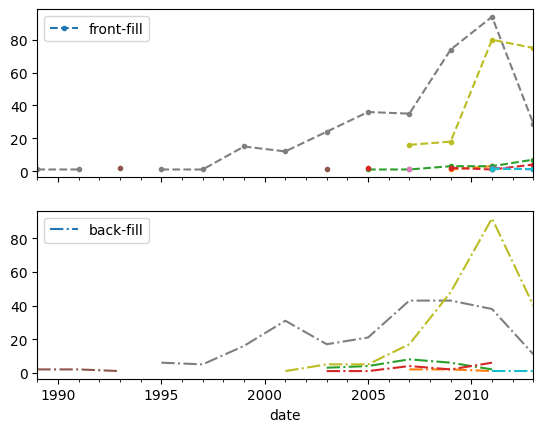

In [25]:
fig, ax = plt.subplots(2, sharex=True)
planets_pt.asfreq('2A', method='ffill').plot(ax=ax[0], style='--.')  # 'A' - код годовой периодичности
planets_pt.asfreq('2A', method='bfill').plot(ax=ax[1], style='-.')
ax[1].legend(['back-fill'])
ax[0].legend(['front-fill'])

## Визуализация

In [58]:
towns_extended

,federal_district,region_name,city,population,lat,lon,region_name_ao,region_iso_code,okato,oktmo,kladr_id,fias_id,place_id,region_area,region_size_percent
0,Сибирский,Алтайский край,Алейск,29.0,52.492251,82.779361,NaN,RU-ALT,1403000000,1703000001,2200000200000,ae716080-f27b-40b6-a555-cf8b518e849e,257210632.0,167996.0,"0,98"
1,Сибирский,Алтайский край,Барнаул,632.4,53.347997,83.779806,NaN,RU-ALT,1401000000,1701000001,2200000100000,d13945a8-7017-46ab-b1e6-ede1e89317ad,258390190.0,167996.0,"0,98"
2,Сибирский,Алтайский край,Белокуриха,15.2,51.996152,84.983960,NaN,RU-ALT,1404000000,1704000001,2200000300000,e4edca96-9b86-4cac-8c7f-cc93d9ba4cd1,258169961.0,167996.0,"0,98"
3,Сибирский,Алтайский край,Бийск,199.5,52.539386,85.213845,NaN,RU-ALT,1405000000,1705000001,2200000400000,52f876f6-cb1d-4f23-a22f-b692609fc1e0,258937159.0,167996.0,"0,98"
4,Сибирский,Алтайский край,Горняк,12.3,50.997962,81.464336,NaN,RU-ALT,1225501000,1625101001,2202700100000,094b3627-2699-4782-8492-4d82aac71958,259062368.0,167996.0,"0,98"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Центральный,Ярославская область,Ростов,30.5,57.205132,39.437862,NaN,RU-YAR,78410000000,78637101001,7601400100000,ab242d02-4d6c-4a1a-a9ce-ed9db691fc31,259056467.0,36177.0,"0,21"
1113,Центральный,Ярославская область,Рыбинск,184.6,58.048550,38.858412,NaN,RU-YAR,78415000000,78715000001,7601500100000,292c0a6a-47ce-435d-8a75-f80e9ce67fba,258807280.0,36177.0,"0,21"
1114,Центральный,Ярославская область,Тутаев,39.8,57.867499,39.536963,NaN,RU-YAR,78417000000,78643101001,7601600100000,55aa704c-ff9b-45e6-9493-eb10890e2824,259241767.0,36177.0,"0,21"
1115,Центральный,Ярославская область,Углич,31.8,57.522425,38.302004,NaN,RU-YAR,78420000000,78646101001,7601700100000,bddb02e3-ce5b-4128-8433-b4ad228914b9,257920676.0,36177.0,"0,21"


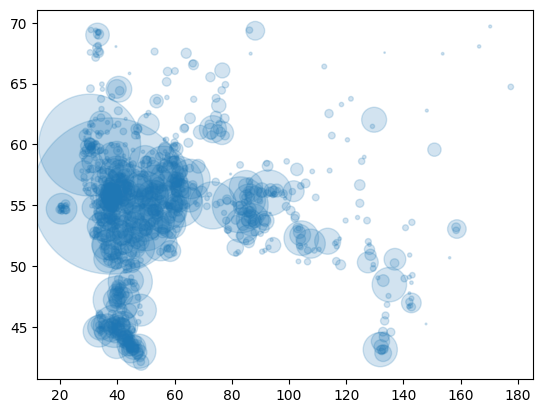

In [73]:
plt.scatter('lon', 'lat', data=towns_extended, s='population', alpha=0.2)